# Automatic filtering images

In [476]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract


In [477]:
def canny_edge_detection(image):
    edges = cv2.Canny(image, 80, 100, 2)
    plt.subplot(121), plt.imshow(image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(edges, cmap='gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    return edges


In [478]:
def denoising(image):
    dst = cv2.fastNlMeansDenoising(image, None)
    plt.subplot(121), plt.imshow(image,'gray')
    plt.subplot(122), plt.imshow(dst,'gray')
    plt.show()

    return dst

In [479]:
def gaussian_blur(image):
    blur = cv2.GaussianBlur(image, (3, 3), 0)
    plt.subplot(121), plt.imshow(image,'gray'), plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(blur,'gray'), plt.title('Blurred')
    plt.xticks([]), plt.yticks([])
    plt.show()
    return blur

In [480]:
def thresholding(image):
    th3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2.25)
    return th3

In [481]:
def erosion(image):
    erosion_size = 1
    max_elem = 2
    max_kernel_size = 21
    title_trackbar_element_shape = 'Element:\n 0: Rect \n 1: Cross \n 2: Ellipse'
    title_trackbar_kernel_size = 'Kernel size:\n 2n +1'
    title_erosion_window = 'Erosion Demo'
    title_dilation_window = 'Dilation Demo'
    erosion_shape = cv2.MORPH_RECT

    element = cv2.getStructuringElement(erosion_shape, (2 * erosion_size + 1, 2 * erosion_size + 1), (erosion_size, erosion_size))

    erosion_dst = cv2.erode(image, element)
    plt.subplot(121), plt.imshow(image,'gray'), plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(erosion_dst,'gray'), plt.title('Erosion')
    plt.xticks([]), plt.yticks([])
    plt.show()
    return erosion_dst

In [482]:
def dilation(image):
    dilatation_size = 1
    dilation_shape = cv2.MORPH_RECT
    element = cv2.getStructuringElement(dilation_shape, (2 * dilatation_size + 1, 2 * dilatation_size + 1), (dilatation_size, dilatation_size))
    dilatation_dst = cv2.dilate(image, element)
    plt.subplot(121), plt.imshow(image,'gray'), plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(dilatation_dst,'gray'), plt.title('Dilatation')
    plt.xticks([]), plt.yticks([])
    plt.show()
    return dilatation_dst

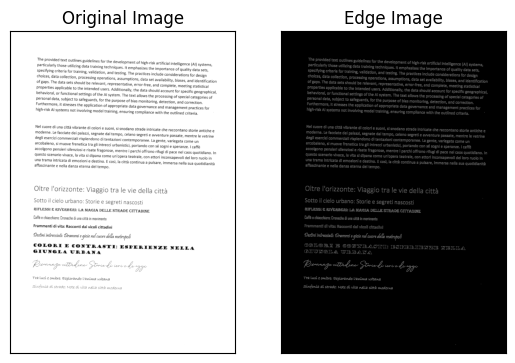

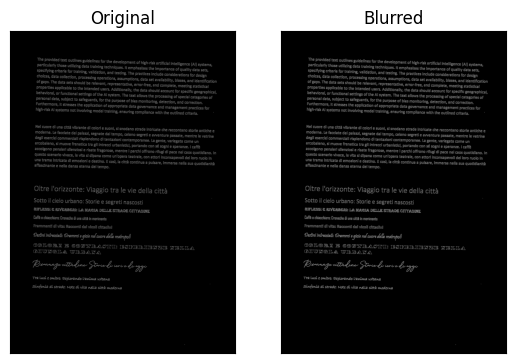

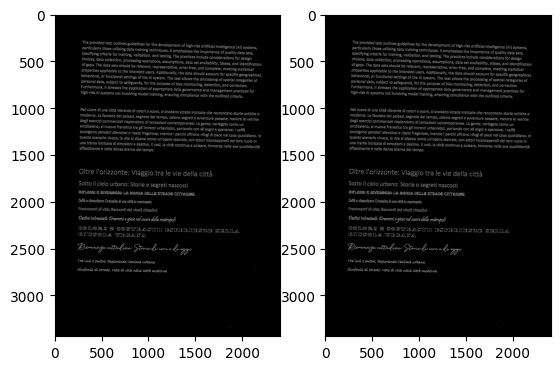

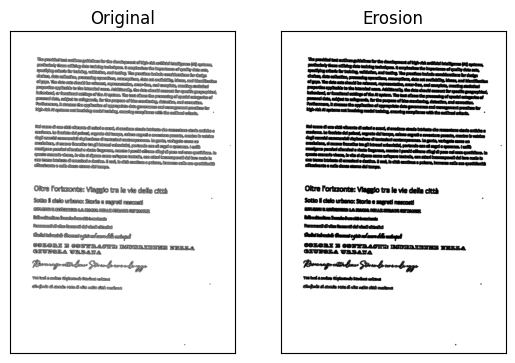

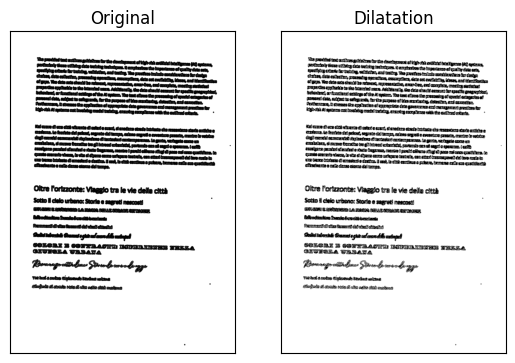

 ciao The provided text outlines guidelines for the development of high-risk artificial intelligence (Al) systems,
particularly those utilizing data training techniques. It emphasizes the importance of quality data sets,
specifying criteria for training, validation, and testing. The practices include considerations for design
choices, data collection, processing operations, assumptions, data set availability, biases, and identification
of gaps. The data sets should be relevant, representative, error-free, and complete, meeting statistical
properties applicable to the intended users. Additionally, the data should account for specific geographical,
behavioral, or functional settings of the Al system. The text allows the processing of special categories of
personal data, subject to safeguards, for the purpose of bias monitoring, detection, and correction.
Furthermore, it stresses the application of appropriate data governance and management practices for
high-risk Al systems not involving

In [483]:
if __name__ == "__main__":
    img = cv2.imread('../images/010.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    assert img is not None, "file could not be read, check with os.path.exists()"
    canny = canny_edge_detection(img)
    blurr = gaussian_blur(canny)
    denois = denoising(blurr)
    thresh = thresholding(denois)
    eroded = erosion(thresh)
    dilated = dilation(eroded)
    text = pytesseract.image_to_string(img, lang='eng')
    print("\033[92m {}\033[00m" .format('ciao ' +text))
    text = pytesseract.image_to_string(dilated, lang='eng')
    print("\033[92m {}\033[00m" .format('ciao2 ' +text))